# Anatomia da Matplotlib
- Neste notebook vamos começar a ver como funciona a anatomia básica da biblioteca
- Veremos como são desenhados os plots
- Porém, a maior parte do que é feito aqui fica transparente para usuário. Porém, para entender melhor e saber como lidar com problemas no futuro, é interessante saber

# `Line2D`: criando linhas em um plot
- Vamos começar com o submódulo `Line2D`, que é utilizado para desenhar linhas em um plot
- Como vamos ver mais pra frente, esse submódulo é transparente ao usuário
    - Normalmente, só chamamos um função de plot que já desenha tudo pra gente
- Porém, sempre que uma linha é desenhada, esse é o submódulo utilizado por trás dos panos


- Se já é feito tudo transparente ao usuário, porque preciso saber disso?
    - Para entender como funciona a biblioteca
    - Ter mais insights quando quiser fazer gráficos mais complicados
    - Entender melhor erros e bugs e como corrigi-los

In [1]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

## Criando o primeiro plot chamando Line2D explícitamente

- **Criando os dados de entrada**
    - Vamos gerar uma entrada `x` que serão 10 valores de 1 até 20 igualmente espaçados
    - Vamos gerar duas saídas `y1` e `y2` que serão o seno e cosseno de `x`

In [2]:
x = np.linspace(1, 20, 10)
y1 = np.cos(x)
y2 = np.sin(x)

- **Agora vamos criar duas linhas da seguinte forma:**
    - Tip: utilize `shift` + `tab` para ver o docstring e todos os parametros que você pode utilizar

In [3]:
line1 = Line2D(x, y1)
line2 = Line2D(x, y2)

- **Adicionando linhas em um plot**
    - Vamos usar o modelo de orientação a objetos (ilustrado no notebook 01) para criar uma `Figure` e um `Axes`
    - Na sequencia, vamos adicionar as duas linhas no `Axes`

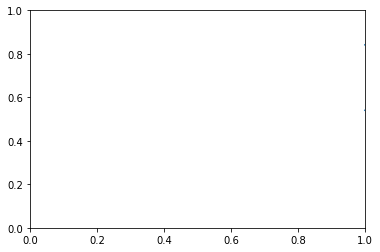

In [4]:
fig, ax = plt.subplots()
ax.add_line(line1)
ax.add_line(line2)

- **Porque o plot ficou vazio?**
    - Por padrão, o subplot cria os eixos `x` e `y` dentro do intervalo 0 e 1
    - Precisamos ajustar isso, uma vez que os dados não estão nesse intervalo
    - Vamos usar o método `ax.autoscale()` que basicamente determina os limites `ylim` e `xlim` adequados para mostrar o plot corretamente

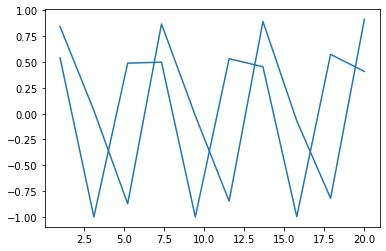

In [5]:
ax.autoscale()
fig

- Podemos alterar o tamanho da figura para melhorar nossa visualização

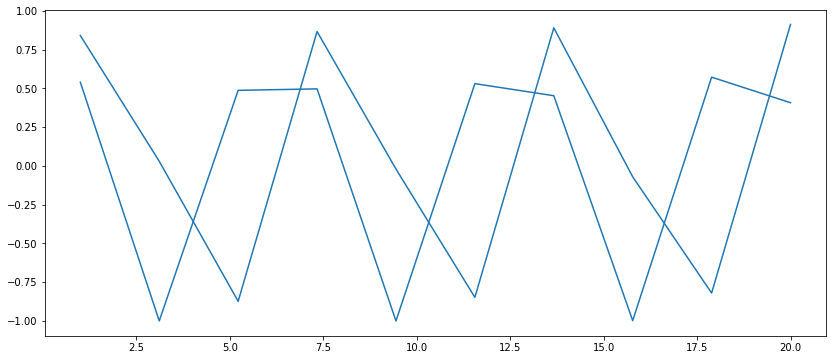

In [6]:
fig.set_size_inches(14, 6) 
fig

- **Acessando as linhas adicionadas em um `Axes`**
    - Podemos acessar todas as linhas adicionadas em `Axes` através do atributo `lines`

In [7]:
ax.lines

- Perceba que temos duas linhas dentro do `Axes`
- Podemos acessá-las e altera-lás
- Por exemplo, vamos alterar a cor da linha 2

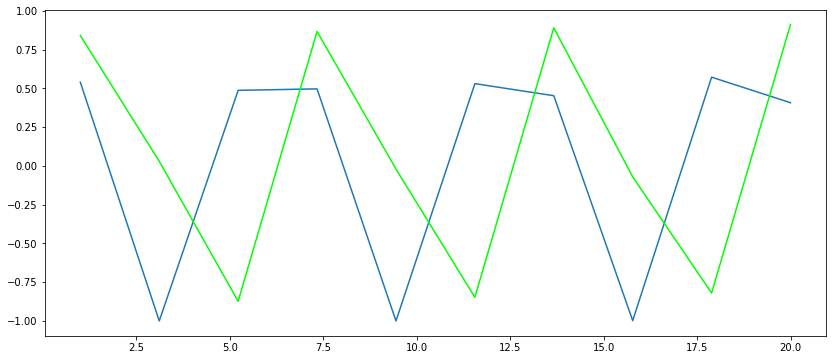

In [8]:
ax.lines[1].set_color('lime')
ax.figure

- Para um guia completo de todas as cores disponíveis na biblioteca, acesse a documentação [aqui](https://matplotlib.org/3.5.0/tutorials/colors/colors.html) ou [aqui](https://matplotlib.org/3.5.0/gallery/color/named_colors.html)
- Podemos realizar diversas alterações artísticas através desse acesso dos atributos de `ax`

## Alterando os atributos de uma linha adicionada no `Axes`
- Além da cor, existem dezenas de atributos que podem ser alterados para modificar a linha em um `Axes`
- Vamos brincar com alguns deles

1. **Mudar espessura da linha**

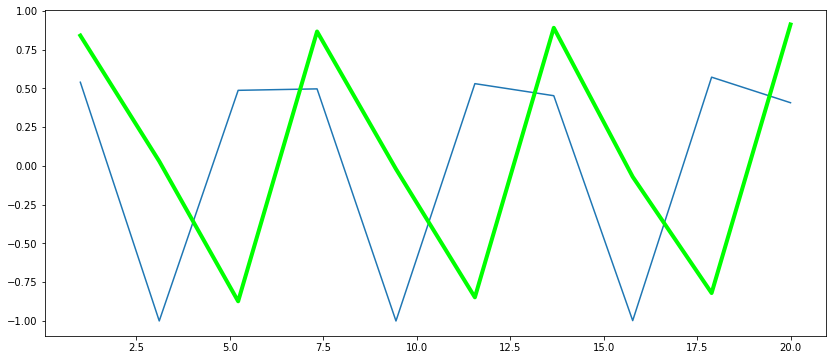

In [10]:
ax.lines[1].set_linewidth(4)   
ax.figure

2. **Mudar o estilo da linha**
    - Para ver todos os estilos possíveis, acesse a [documentação](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)

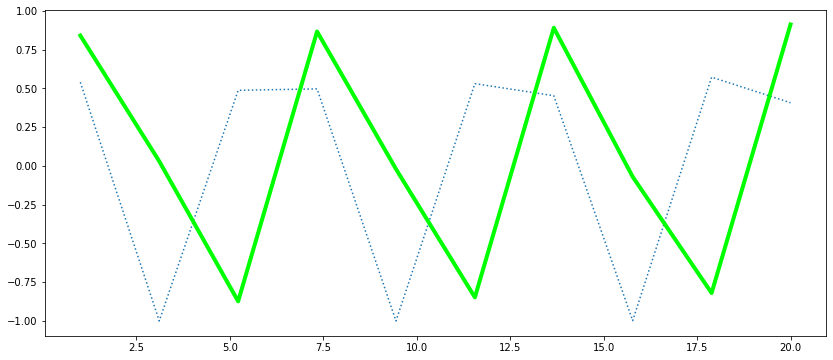

In [11]:
ax.lines[0].set_linestyle('dotted')
fig

3. **Mudar o marcador da linha**
    - Para ver todos os marcadores possíveis, acesse a [documentação](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle)

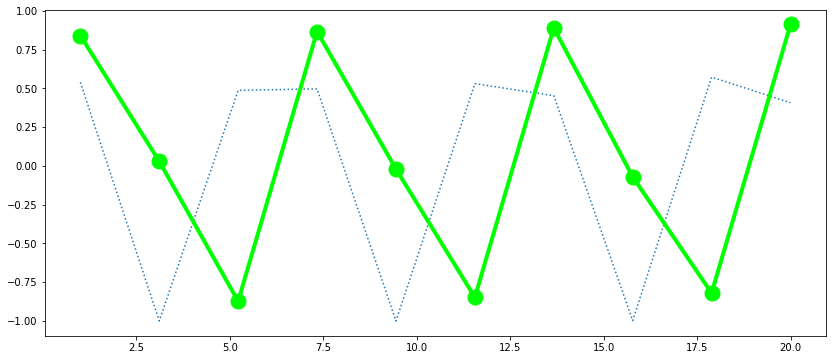

In [16]:
ax.lines[1].set_marker('o')
ax.lines[1].set_markersize(15)
fig

4. **Mudar a opacidade da linha**

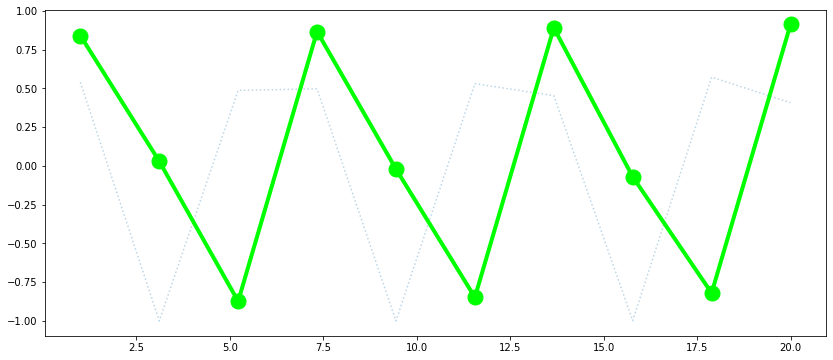

In [17]:
ax.lines[0].set_alpha(0.3)
fig

## Juntando tudo isso na chamada do `Line2D`
- Podemos setar todos esses atributos diretamente na instanciação da classe Line2D
- Então porque eu posso mudar por fora?
    - Pra dar liberdade para alterar algum gráfico de acordo com algo que ocorreu no seu código

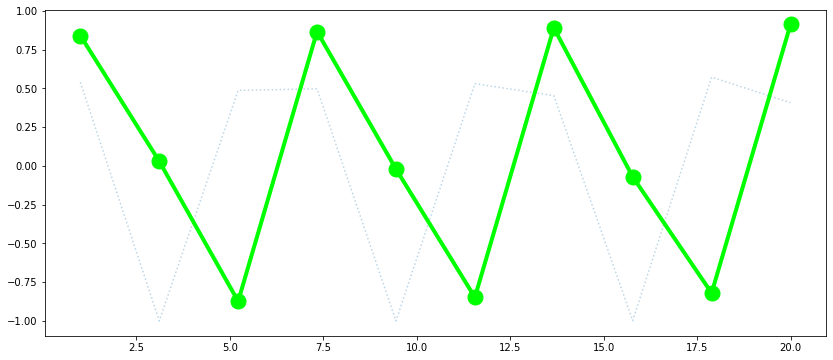

In [21]:
new_line1 = Line2D(x, y1, linestyle="dotted", alpha=0.3)
new_line2 = Line2D(x, y2, color="lime", marker="o", markersize=15, linewidth=4)

new_fig, new_ax = plt.subplots()
new_ax.add_line(new_line1)
new_ax.add_line(new_line2)
new_ax.autoscale()
new_fig.set_size_inches(14, 6) 

- **Também podemos definir outras partes artísticas**

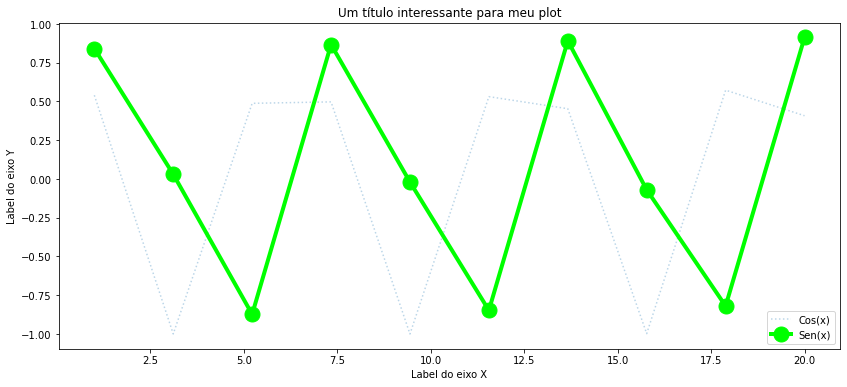

In [24]:
new_ax.set_title("Um título interessante para meu plot")
new_ax.set_xlabel('Label do eixo X')
new_ax.set_ylabel('Label do eixo Y')
new_ax.legend(["Cos(x)", "Sen(x)"], loc="lower right")
new_fig

- **Também podemos salvar esse plot**

In [25]:
fig.savefig("meu_plot.png", dpi=300)

- Os formatos suportados:

In [26]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}